## Описание данных

Имеются следующие поля:

* Rank – место по объему продаж
* Name – название игры
* Platform – платформа, на которой выпущена игра
* Year – год релиза
* Genre – жанр
* Publisher – издатель
* NA_Sales – продажи в Северной Америке, в млн.
* EU_Sales – продажи в Европе, в млн.
* JP_Sales – продажи в Японии, в млн.
* Other_Sales – продажи в остальном мире, в млн.
* Global_Sales – продажи по всему миру, в млн.

### Задание 1

Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

*В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.*

In [1]:
import pandas as pd
import numpy as np

In [2]:
games = pd.read_csv('games.csv')
games.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
games.shape

(16598, 11)

In [5]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Ответ: Year 271

In [6]:
games.dropna(inplace=True)

### Задание 2

Проверим, какие переменные являются количественными, а какие категориальными. Соотнесите названия переменных с соответствующим типом данных.

Ответ:
* Rank (место по объему продаж) - **Ранговая/порядковая**	
* Name (название) - **Номинативная**		
* Platform (платформа) - **Номинативная**			
* Genre (жанр) - **Номинативная**				
* Publisher (издатель) - **Номинативная**				
* Year (год) - **Дискретная**				
* NA_Sales (объем продаж)	- **Непрерывная**			
* EU_Sales (объем продаж) - **Непрерывная**			
* JP_Sales (объем продаж) - **Непрерывная**				
* Other_Sales (объем продаж) - **Непрерывная**				
* Global_Sales (объем продаж) - **Непрерывная**	

### Задание 3

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

Выберите верные утверждения:

* Мода равна 2009
* Мода равна 2007
* Медианный год меньше, чем средний
* Примерно половина игр была выпущена после 2007 года
* Медианный год больше, чем средний

In [7]:
games['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [8]:
games['Year'].mode()

0    2009.0
Name: Year, dtype: float64

Ответ:
* Мода равна 2009
* Примерно половина игр была выпущена после 2007 года
* Медианный год больше, чем средний

### Задание 4

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

*Пример: 'Wii', 'NES', 'GB'*

In [9]:
frequency = games['Platform'].value_counts(normalize=True)
frequency.head()


DS      0.130808
PS2     0.130563
PS3     0.080044
Wii     0.079185
X360    0.075747
Name: Platform, dtype: float64

In [10]:
frequency_above_7 = frequency.reset_index().query('Platform > 0.07')
frequency_above_7

,index,Platform
0,DS,0.130808
1,PS2,0.130563
2,PS3,0.080044
3,Wii,0.079185
4,X360,0.075747
5,PSP,0.073476
6,PS,0.072985


Ответ: 'DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'

### Задание 5

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости

In [11]:
games['Publisher'].value_counts().head()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: Publisher, dtype: int64

Ответ: Electronic Arts 1339

### Задание 6

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [12]:
nintendo = games[games['Publisher'] == 'Nintendo']
nintendo.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [13]:
print(f"""
Регион NA:
mean - {nintendo['NA_Sales'].mean()}
median - {nintendo['NA_Sales'].median()}
std - {nintendo['NA_Sales'].std()}
Регион EU:
mean - {nintendo['EU_Sales'].mean()}
median - {nintendo['EU_Sales'].median()}
std - {nintendo['EU_Sales'].std()}
Регион JP:
mean - {nintendo['JP_Sales'].mean()}
median - {nintendo['JP_Sales'].median()}
std - {nintendo['JP_Sales'].std()}
Регион Other:
mean - {nintendo['Other_Sales'].mean()}
median - {nintendo['Other_Sales'].median()}
std - {nintendo['Other_Sales'].std()}
""")


Регион NA:
mean - 1.1720545977011492
median - 0.375
std - 2.9899128164968642
Регион EU:
mean - 0.6010057471264366
median - 0.12
std - 1.743953375382063
Регион JP:
mean - 0.6537212643678161
median - 0.28
std - 1.063110044538652
Регион Other:
mean - 0.13676724137931034
median - 0.03
std - 0.4641703766411941



Ответ: NA

### Задание 7

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

* по оси x будет расположен жанр игры (Genre)
* по оси у – объем продаж в Японии (JP_sales)

Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных? Выберите верные утверждения.

* Межквартильный размах у Strategy меньше, чем у Puzzle
* Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
* Наибольший межквартильный размах наблюдается у игр жанра Fighting
* Наибольший межквартильный размах наблюдается у игр жанра Role-Playing
* Среднее значение продаж игр жанра Fighting выше, чем у игр Simulation

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

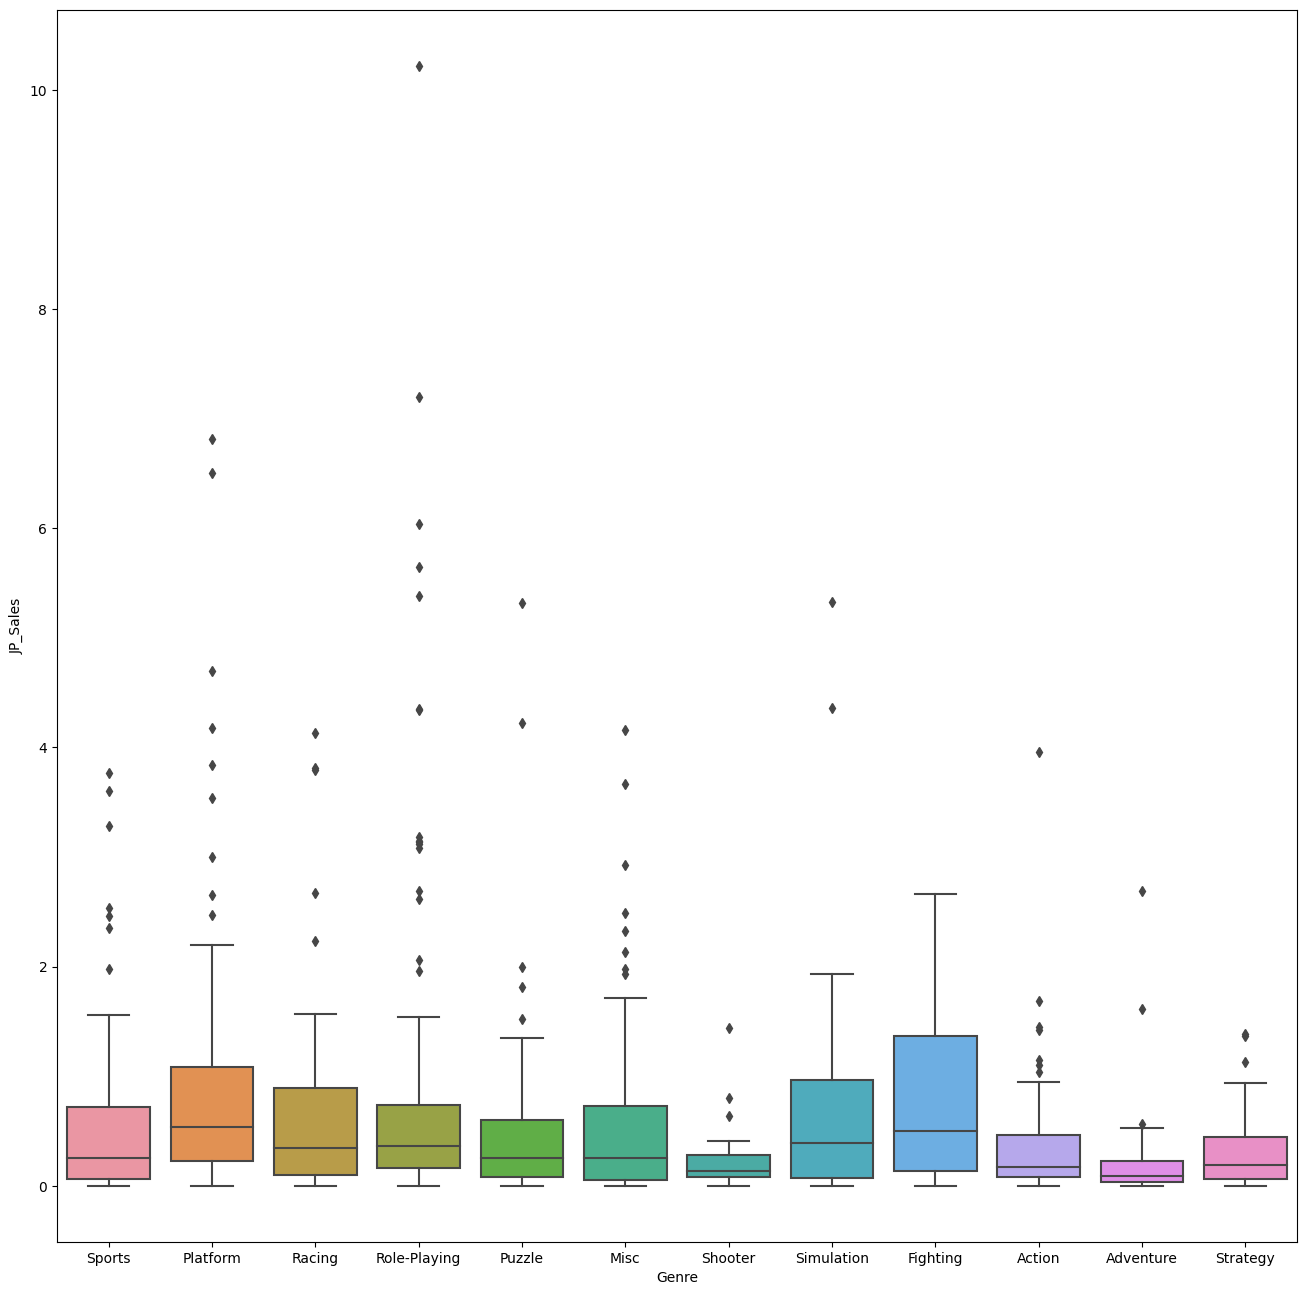

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
sns.boxplot(x=nintendo['Genre'], y=nintendo['JP_Sales'])

Ответ:
* Межквартильный размах у Strategy меньше, чем у Puzzle
* Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
* Наибольший межквартильный размах наблюдается у игр жанра Fighting

### Задание 8

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.

* 2005 – 2006
* 1998 – 2014
* 2009 – 2015
* 2005 – 2010

In [15]:
global_genres = nintendo.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")\
        .groupby(['Year', 'Genre'], as_index=False)['Global_Sales'].sum()
global_genres.head(3)

,Year,Genre,Global_Sales
0,1983.0,Platform,5.62
1,1983.0,Sports,3.20
2,1984.0,Racing,5.68


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

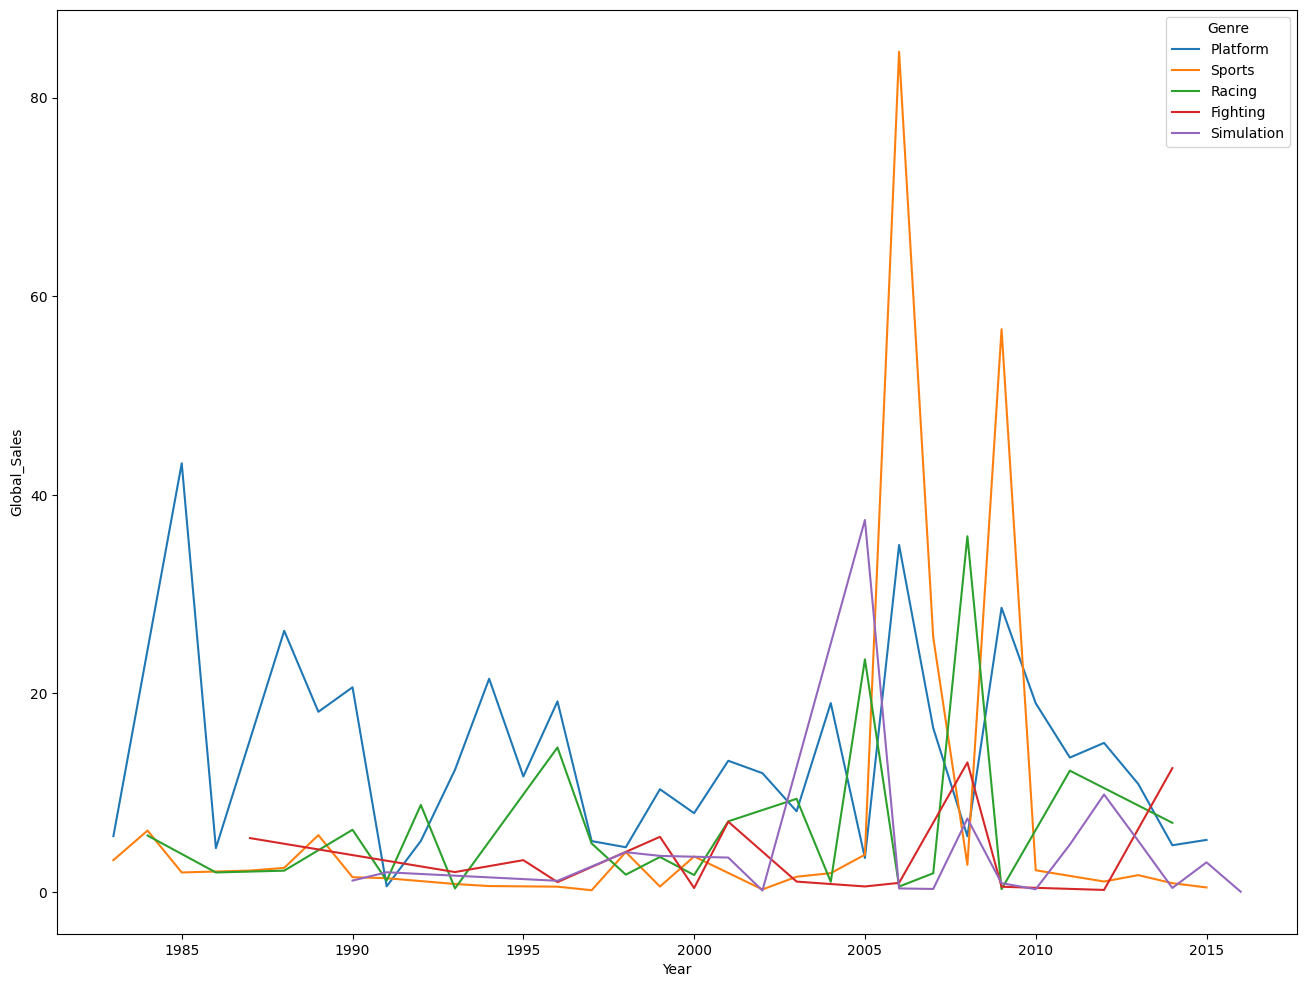

In [16]:
plt.figure(figsize=(16,12))
sns.lineplot(x = global_genres['Year'],\
             y = global_genres['Global_Sales'],\
             hue = global_genres['Genre'],\
             data = global_genres)

Ответ: 
* 2005 – 2010